# ANALISIS EXPLORATORIO
El analisis exploratorio lo realizamos de tipo correlacional, ante la necesidad de identificar la asociación que existe entre las variables meteorológicas involucradas

Importamos Librerias:

In [65]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import Lasso, SGDRegressor, Ridge, LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neural_network import MLPRegressor

Importamos dataframe

In [66]:
data = pd.read_csv("D:\Dataviz\Proyecto Final\data\wind_dataset.csv")
data.head()

,DATE,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
0,1961-01-01,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0
1,1961-01-02,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1
2,1961-01-03,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5
3,1961-01-04,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2
4,1961-01-05,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5


A continuación buscamos obtener un resumen estadístico de las columnas numéricas del DataFrame: 
- cantidad de observaciones
- media
- desviación estándar
- valor mínimo
- primer cuartil
- segundo cuartil
- tercer cuartil 
- valor máximo.

In [50]:
data.describe()

,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
count,6574.000000,6574.000000,6574.000000,6513.000000,5953.000000,6513.000000,5900.000000,6214.000000
mean,9.796834,0.391542,1.885169,0.356364,13.339123,0.464456,6.411678,2.736547
std,4.977272,1.179092,4.030529,1.128552,4.890546,1.177571,4.637243,5.569175
min,0.000000,0.000000,0.000000,0.000000,-0.100000,0.000000,-11.500000,-14.400000
25%,6.000000,0.000000,0.000000,0.000000,9.600000,0.000000,3.000000,-1.000000
50%,9.210000,0.000000,0.200000,0.000000,13.300000,0.000000,6.500000,3.000000
75%,12.960000,0.000000,2.000000,0.000000,17.200000,0.000000,10.000000,7.000000
max,30.370000,4.000000,67.000000,4.000000,26.800000,4.000000,18.000000,15.800000


En el análisis de los datos, no se identifican valores atípicos; todos los valores observados se corresponden con el comportamiento típico esperado para la variable objetivo, pero sí observamos datos faltante en algunas columnas.


Verificamos cuantos datos nulos tiene el **Dataset**

In [68]:
numeros_nulos = data.isnull().sum()
print(numeros_nulos)
total_nulos = data.isnull().sum().sum()
print(f'Total de valores nulos en el dataset: {total_nulos}')
data.dtypes

DATE         0
WIND         0
IND          0
RAIN         0
IND.1       61
T.MAX      621
IND.2       61
T.MIN      674
T.MIN.G    360
dtype: int64
Total de valores nulos en el dataset: 1777


DATE        object
WIND       float64
IND          int64
RAIN       float64
IND.1      float64
T.MAX      float64
IND.2      float64
T.MIN      float64
T.MIN.G    float64
dtype: object

**Del dataset tenemos 6574 datos, 8 variales númericas y 1777 números nulos**

Rellenamos los datos faltante de la temperatura con la media y los de los indices con el más repetido. Obtenemos la media y la moda de los datos 

In [71]:
coluTemp = ["T.MAX" ,"T.MIN" ,"T.MIN.G" ]
for i in coluTemp:
    print(i)
    print(data[i].mean())
coluInd = ["IND.1","IND.2"]
for i in coluTemp:
    print(i)
    print(data[i].mode())


T.MAX
13.339123131194354
T.MIN
6.411677966101696
T.MIN.G
2.73654650788542
T.MAX
0    10.0
dtype: float64
T.MIN
0    9.0
dtype: float64
T.MIN.G
0    5.0
dtype: float64


Con el resultado obtenido de media y moda, rellenamos los datos faltante del dataframe

In [72]:
FilterInd1 = 0.0
FilterTmax = 10.0
FilterInd =0.0
FilterTMIN = 9.0
FilterTMIN_g = 5.0
data["IND.1"].fillna(FilterInd1 , inplace = True)
data["T.MAX"].fillna(FilterTmax , inplace = True)
data["IND.2"].fillna(FilterInd , inplace = True)
data["T.MIN"].fillna(FilterTMIN , inplace = True)
data["T.MIN.G"].fillna(FilterTMIN_g , inplace = True)

Verificamos que no tenemos datos nulos en el Dataframe

In [73]:
data.describe()

,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
count,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000
mean,9.796834,0.391542,1.885169,0.353057,13.023699,0.460146,6.677046,2.860496
std,4.977272,1.179092,4.030529,1.123823,4.755173,1.172940,4.462681,5.438954
min,0.000000,0.000000,0.000000,0.000000,-0.100000,0.000000,-11.500000,-14.400000
25%,6.000000,0.000000,0.000000,0.000000,10.000000,0.000000,3.500000,-0.900000
50%,9.210000,0.000000,0.200000,0.000000,12.400000,0.000000,7.300000,3.400000
75%,12.960000,0.000000,2.000000,0.000000,16.800000,0.000000,9.600000,6.600000
max,30.370000,4.000000,67.000000,4.000000,26.800000,4.000000,18.000000,15.800000


Descomponemos la columna ``DATE`` en sus componentes individuales

In [76]:
data['DATE'] = pd.to_datetime(data['DATE'])

data['YEAR'] = data['DATE'].dt.year
data['MONTH'] = data['DATE'].dt.month
data['DAY'] = data['DATE'].dt.day
data.head()

,DATE,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G,YEAR,MONTH,DAY
0,1961-01-01,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0,1961,1,1
1,1961-01-02,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1,1961,1,2
2,1961-01-03,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5,1961,1,3
3,1961-01-04,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2,1961,1,4
4,1961-01-05,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5,1961,1,5


Código para visualizar el comportamiento de la variable obejetivo durante un periodo de 5 años

Text(0.5, 1.0, 'Gráfico de la Velocidad del Viento')

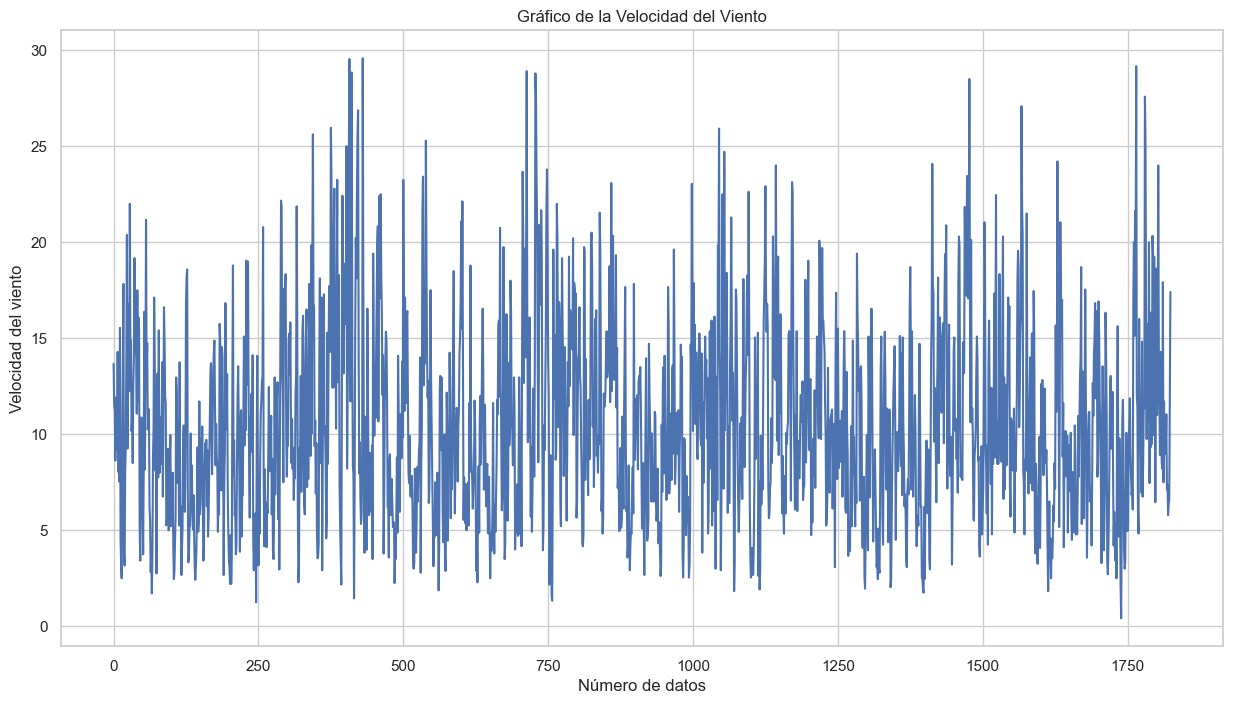

In [77]:

data_subset = data.iloc[:1825]
data_reset = data_subset.reset_index()

plt.figure(figsize=(15, 8))
plt.plot(data_reset.index, data_reset['WIND'])
plt.xlabel('Número de datos')
plt.ylabel('Velocidad del viento')
plt.title('Gráfico de la Velocidad del Viento')

Para facilitar la visualización del ajuste del modelo, se han representado gráficamente los primeros 1825 datos del dataset, correspondientes a cinco años. Esta visualización permite observar el comportamiento no cíclico de la velocidad del viento.

Código para visualizar la distribución de la variable objetivo y su transformación de raíz cuadrada

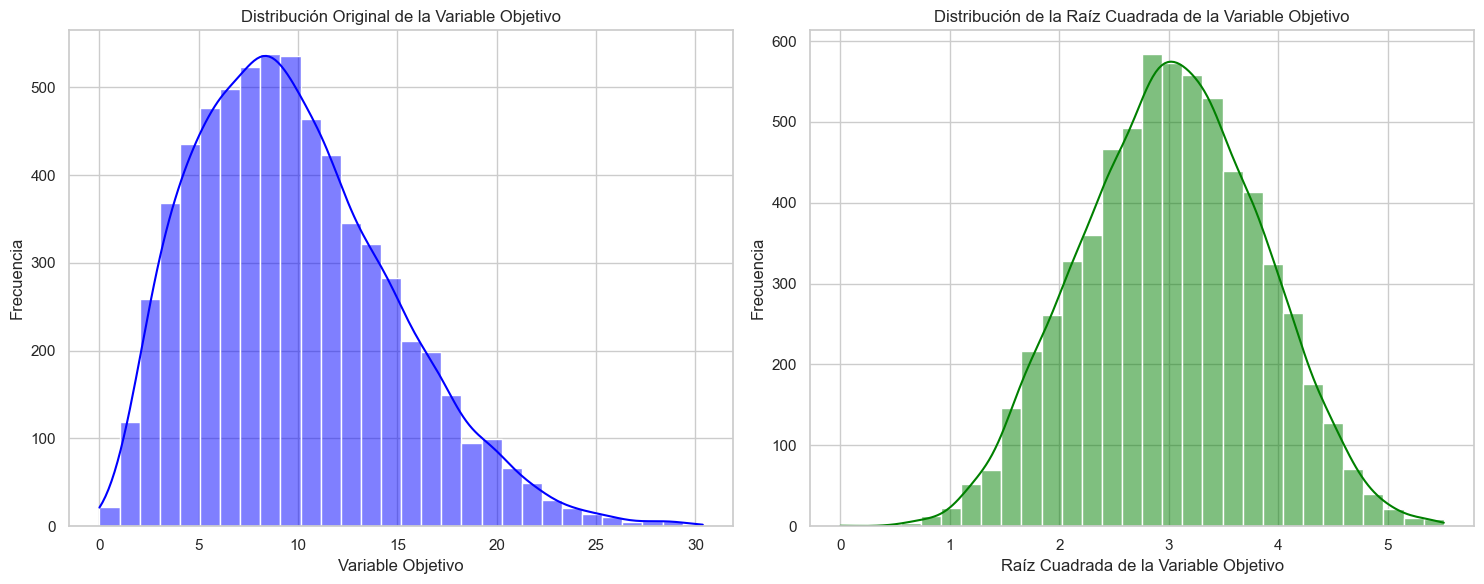

In [78]:
sns.set(style="whitegrid")

# Crear una nueva columna para la transformación de raíz cuadrada
data['R2'] = np.sqrt(data['WIND'])

# Crear un layout de gráficos con 1 fila y 2 columnas
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
# Graficar la distribución original
sns.histplot(data['WIND'], bins=30, kde=True, ax=axes[0], color='blue')
axes[0].set_title('Distribución Original de la Variable Objetivo')
axes[0].set_xlabel('Variable Objetivo')
axes[0].set_ylabel('Frecuencia')

# Graficar la distribución transformada
sns.histplot(data['R2'], bins=30, kde=True, ax=axes[1], color='green')
axes[1].set_title('Distribución de la Raíz Cuadrada de la Variable Objetivo')
axes[1].set_xlabel('Raíz Cuadrada de la Variable Objetivo')
axes[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()


Del análisi de distribución de las variable predictora, se identificó que no hay presencia de sesgo
significativo en la distribución de frecuencias

Exploramos todas las variables con graficos de series temporales, lo que permite observar cómo cambian los valores de cada variable a lo largo del tiempo.

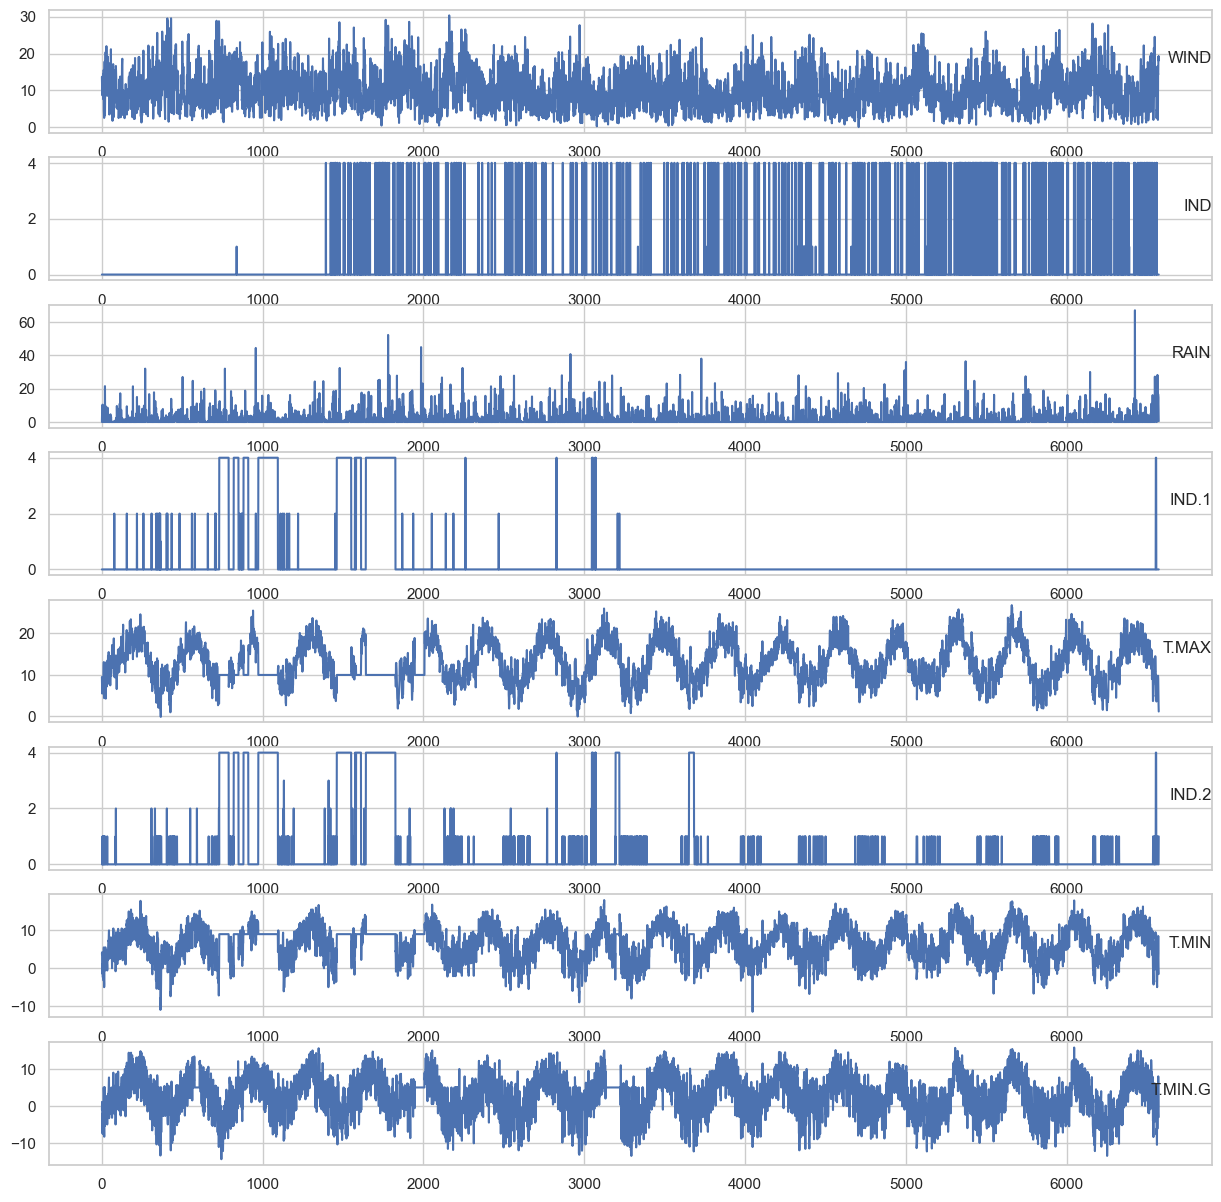

In [81]:
values = data.values
# specify columns to plot
groups = [ 1, 2, 3,4, 5, 6, 7,8]
i = 1
# plot each column
pyplot.figure(figsize=(15,15))
for group in groups:
    pyplot.subplot(len(groups), 1, i)
    pyplot.plot(values[:, group])
    pyplot.title(data.columns[group], y=0.5, loc='right')
    i += 1
pyplot.show()

Revisamos si los meses del año tiene relación con la velocidad del viento

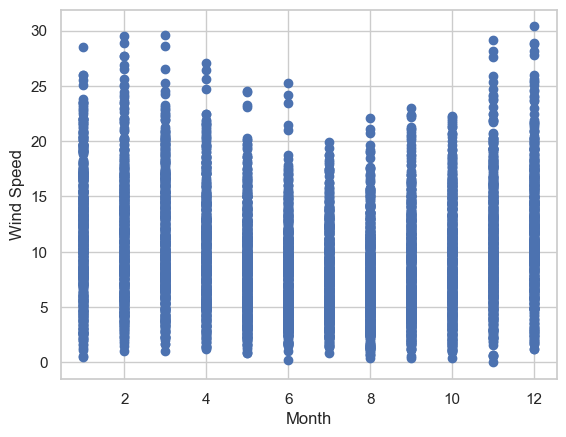

In [84]:
month = data["MONTH"]
wind  = data['WIND']
plt.xlabel('Month')
plt.ylabel('Wind Speed')
plt.scatter(month , wind)
plt.show()

Del grafico podemos observar que los meses 2, 3, 11 y 12 tienen velocidad del viento altas, para verificar esta relación hacemos otra análisis

Se genera la matriz de correlación, con el fin de identificar numéricamente el nivel de correlación de las variables:

<Axes: >

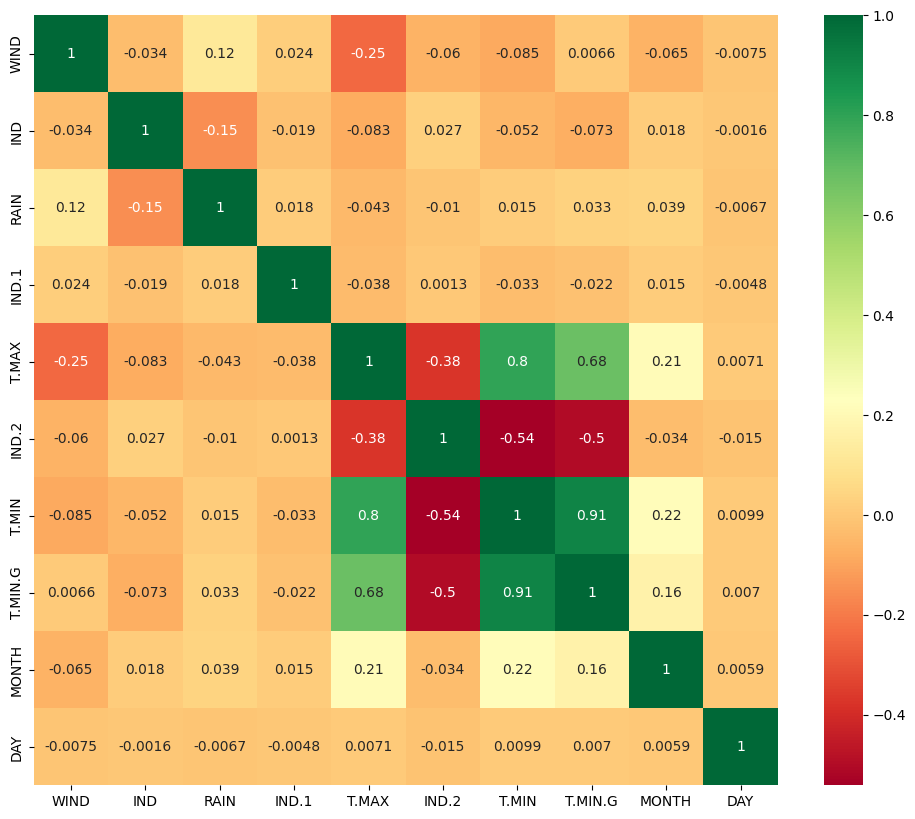

In [15]:
data.drop(['YEAR'], axis = 1, inplace = True)
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
sns.heatmap(data.corr(), annot=True,cmap ='RdYlGn')

La variable **WIND** presenta los valores más bajos de correlación respecto a las demás variables. Existe una relación con la variable **RAIN** de 0.12

Verificamos esta realción entre **WIND** y **RAIN**

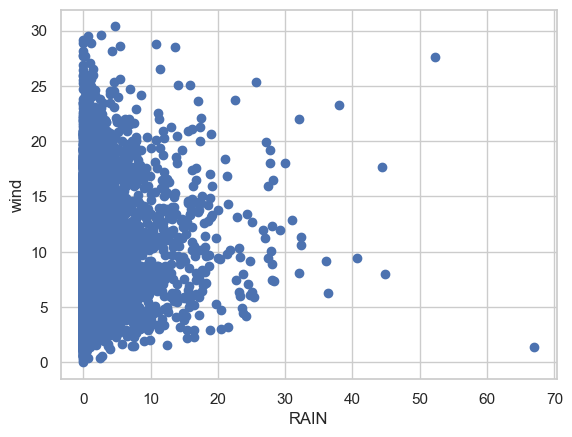

In [86]:
plt.xlabel("RAIN")
plt.ylabel("wind")
plt.scatter(data['RAIN'],wind)
plt.show()

Observamos que no estan muy relacionadas estas variables